<a href="https://colab.research.google.com/github/Vikas-Kumar05/customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will learn how to use keras in NN

This is a binary classification problem where bank data sets are used to predict which customer will leave the bank in the future.

In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DEEP learning work/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace= True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
new_df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first= True)

In [15]:
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [16]:
#taking tran test split
X=new_df.drop(columns=['Exited'])
y= new_df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=41)

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
X_train.shape

(8000, 11)

In [20]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [21]:
X_train_scaled

array([[ 0.04340158, -0.9465415 , -0.34836182, ..., -0.57715782,
        -0.57754272,  0.90339252],
       [ 1.00848656,  0.10318316, -0.69357359, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [ 0.6037735 , -0.56482344, -0.69357359, ..., -0.57715782,
         1.73147365,  0.90339252],
       ...,
       [ 1.79715815,  0.48490122, -1.38399712, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [-0.89055162,  0.19861268,  1.37769701, ...,  1.73262835,
        -0.57754272,  0.90339252],
       [-1.23300113,  0.58033074, -1.38399712, ..., -0.57715782,
         1.73147365, -1.10693854]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# here we can make two type of data one is sequential and other is nonsequencial so here we will work on sequential.
# model =Sequential()
# model.add(Dense(3,activation='sigmoid', input_dim=11))
# model.add(Dense(1, activation = 'sigmoid'))

Here we make a architecture where we will take imput layer and one hidden layer and output layer.
Here we took the 11 input layers and 1 hidden layers and activation function we took i.e sigmoid.

11*3 + 3 and 3*1+1 total parameter 40

In [24]:
model =Sequential()
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation = 'relu'))

in input layers there are 11 nodes and also in hidden layers there are 11 nodes

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# model compile
# model.compile(loss='binary_crossentropy', optimizer= 'Adam')
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [27]:
# model.fit(X_train_scaled,y_train, epochs=10)  #epochs means 10 baar mere model will run and every time they will give new loss
history= model.fit(X_train_scaled,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 3.1289 - accuracy: 0.7958 - val_loss: 2.9744 - val_accuracy: 0.7956
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 2.5374 - accuracy: 0.7881 - val_loss: 1.4521 - val_accuracy: 0.7525
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.7350 - val_loss: 0.6384 - val_accuracy: 0.7713
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7648 - val_loss: 0.5757 - val_accuracy: 0.7694
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5561 - accuracy: 0.7702 - val_loss: 0.5436 - val_accuracy: 0.7906
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7881 - val_loss: 0.5112 - val_accuracy: 0.7850
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7958 - val_loss: 0.5111 - val_accuracy: 0.7987

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'loss': [3.1288983821868896,
  2.5373799800872803,
  0.8473199605941772,
  0.5942832231521606,
  0.5560932755470276,
  0.5418083071708679,
  0.5347802639007568,
  0.5228307247161865,
  0.5126091241836548,
  0.4999448359012604,
  0.4872063100337982,
  0.47194749116897583,
  0.4666711390018463,
  0.4583618640899658,
  0.4524196684360504,
  0.4463352859020233,
  0.4407515823841095,
  0.43055328726768494,
  0.43066900968551636,
  0.43245139718055725,
  0.4243279695510864,
  0.41505706310272217,
  0.4038332402706146,
  0.3953113257884979,
  0.3941294550895691,
  0.3960162103176117,
  0.38346439599990845,
  0.3800051212310791,
  0.37746161222457886,
  0.3819267153739929,
  0.39211317896842957,
  0.3850938379764557,
  0.3847653865814209,
  0.376316636800766,
  0.377594530582428,
  0.37306830286979675,
  0.37659063935279846,
  0.37261250615119934,
  0.37381744384765625,
  0.36874720454216003,
  0.40352708101272583,
  0.39020484685897827,
  0.3716597259044647,
  0.3707793056964874,
  0.3682670

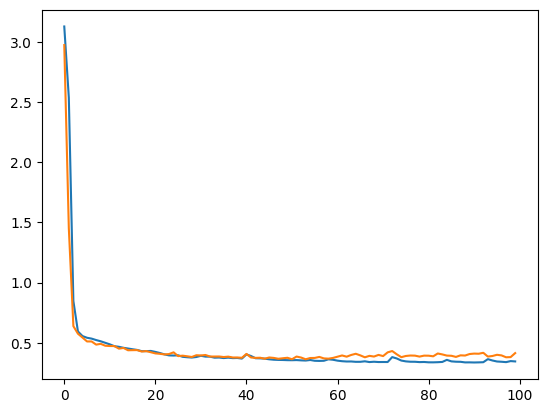

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

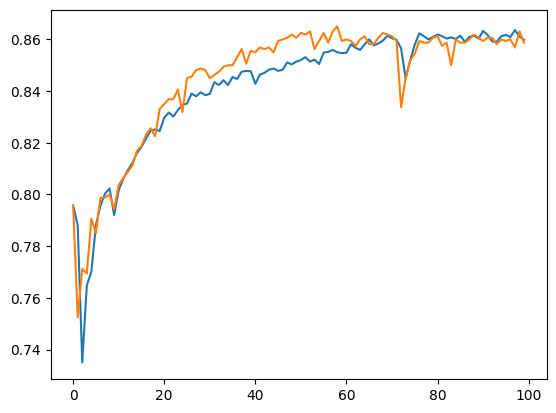

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
model.layers[0].get_weights()

[array([[ 0.0123325 ,  0.08763995, -0.15248509,  0.04742239, -0.35750854,
          0.13320719, -0.2344028 ,  0.18628894, -0.14824381,  0.01814001,
         -0.1269141 ],
        [ 0.46851718, -0.43720847,  0.7540322 ,  0.4834929 ,  0.62579924,
         -0.07163814,  0.2169939 ,  0.23030566,  0.37280324, -0.4323959 ,
          0.26721385],
        [ 0.16828199,  0.08005705, -0.05954568,  0.00277088,  0.10640728,
         -0.07379537,  0.11037009,  0.22999105,  0.027294  , -0.00975007,
          0.05183327],
        [ 0.00823189, -0.03273769,  0.07621625, -0.01569969, -0.02449896,
          0.02152135, -0.4621658 , -0.52734673,  0.1945371 ,  0.06680704,
          0.41754854],
        [-0.33694518,  0.5825634 ,  0.7689334 , -0.3936798 , -0.34492353,
         -0.7915697 ,  0.32234347, -0.1354404 , -0.13089946, -0.09143623,
          0.7756622 ],
        [-0.04113257, -0.15261194,  0.09255482, -0.03319016,  0.07515782,
         -0.08036692,  0.08528399, -0.20766059, -0.06882323, -0.0277444

Here we get the 33 weights and 3 biases

In [33]:
model.layers[1].get_weights()

[array([[ 0.29100546,  0.13041793, -0.43652874, -0.15066135, -0.32226372,
         -0.08463868, -0.36519536,  0.12559418, -0.18079849, -0.02330099,
         -0.45815063],
        [ 0.22780237,  0.05712607,  0.33184257,  0.37812835,  0.17068723,
         -0.02846281,  0.07529146,  0.3558302 ,  0.502531  , -0.05953584,
         -1.8497472 ],
        [ 0.07493793,  0.15155166, -0.59903085,  0.6233841 , -0.37010345,
          0.43686253, -0.5038691 ,  0.5074109 ,  0.35644677, -0.14710519,
         -0.19583404],
        [-0.6116266 , -1.0637457 ,  0.03391349, -0.17156734, -0.03960977,
          0.17329024, -0.95243305,  0.28092197,  0.4052169 ,  0.19292957,
          0.10770456],
        [-0.34617412, -0.06402206,  0.2047103 , -0.28527626,  0.49739414,
          0.12737297,  0.2858562 ,  0.06078831, -0.08591659, -0.09133531,
          0.29573593],
        [-0.31787005,  0.18546431,  0.28388825, -0.12906443, -0.04902533,
         -0.49983668, -0.1361905 ,  0.5363303 ,  0.23015969,  0.5914689

In [34]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.00564803],
       [0.15323925],
       [0.05312098],
       ...,
       [0.        ],
       [0.11502404],
       [0.06235013]], dtype=float32)

In [35]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [36]:
np.where(y_log >0.5,1,0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
y_pred=np.where(y_log >0.5,1,0)

In [38]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

We can increase the accuracy by doing some changes like increase the epochs value like 100 or 1000
and

also we can change the activation function like relu then it will give the good result and

also we can increse the nodes of hidden layers.

We can also increase the hidden layers to improve the accuracy